<a href="https://colab.research.google.com/github/forloulhoucine/TER_Analyse-de-donnees-issues-dun-reseau-urbain/blob/main/TER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importation des librairies**


In [561]:
#libraries 
import numpy as np
import pandas as pd
import random as rd
import seaborn as sb
import matplotlib.pyplot as plt 

### **Importation des datasets**


In [562]:
#Consumption "C"
C=pd.read_csv("Consumption.csv",sep=',',header=None)
#Dates "D"
D=pd.read_csv("dates.csv",sep=',',header=None)
#dayDates "D_D"
D_D=pd.read_csv("dayDates.csv",sep=',',header=None)
#DayType "D_T"
D_T=pd.read_csv("dayType.csv",sep=',')
#Weather "W"
W=pd.read_csv("weather.csv",sep=',')

### Consumption 
**Fréquence Horaire de Consommation de janvier 2015 à janvier 2016** 

Donnees manquantes in the Consumption dataset are: 0
(537, 8760)


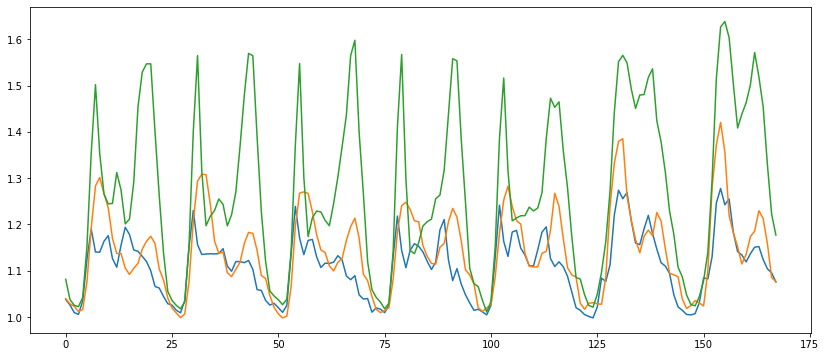

In [563]:
print("Donnees manquantes in the Consumption dataset are:", C.isnull().sum().sum())
print(C.shape)
CC=C.values
# C.iloc[1,:].plot(fontsize=15,figsize=(20,10))
#3 compteurs durant une semaine
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(CC[1,0:168])
plt.plot(CC[2,0:168])
plt.plot(CC[3,0:168])

[Text(0, 0, 'Compteur1'), Text(0, 0, 'Compteur2'), Text(0, 0, 'Compteur3')]

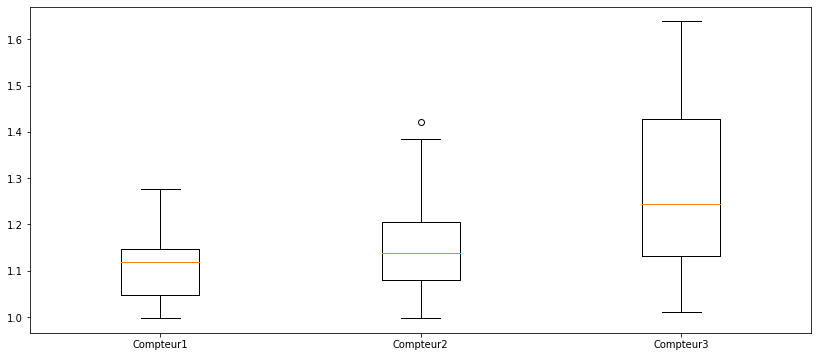

In [564]:
Compteurs = {"Compteur1":CC[1,0:168] ,"Compteur2" :CC[2,0:168],"Compteur3":CC[3,0:168] }
fig,a = plt.subplots()
a.boxplot(Compteurs.values())
a.set_xticklabels(Compteurs.keys())

### Weather 
**Temperature, Precipitation et Humidite durant les 365 jours de l'année**

Donnees manquantes in weather dataset are: 0
(365, 3)
       Temperature  Precipitation    Humidity
count   365.000000     365.000000  365.000000
mean     12.364623       0.067614   78.301484
std       4.966208       0.151764    9.463162
min       0.637500       0.000000   51.125000
25%       9.029167       0.000000   72.833333
50%      12.637500       0.000000   78.708333
75%      15.670833       0.066667   85.625000
max      26.295833       1.108333   96.458333


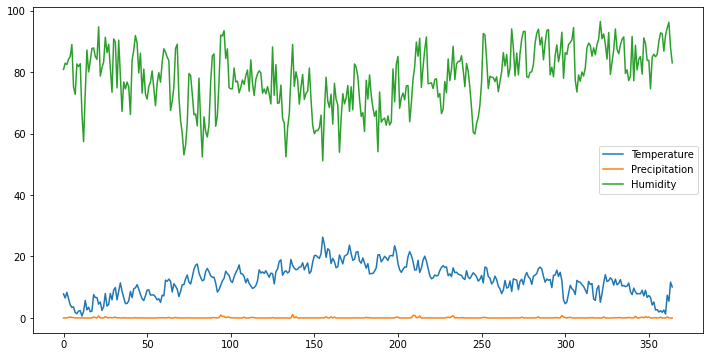

In [565]:
print("Donnees manquantes in weather dataset are:", W.isnull().sum().sum())
print(W.shape)
print(W.describe())
W.plot(figsize=(12,6))

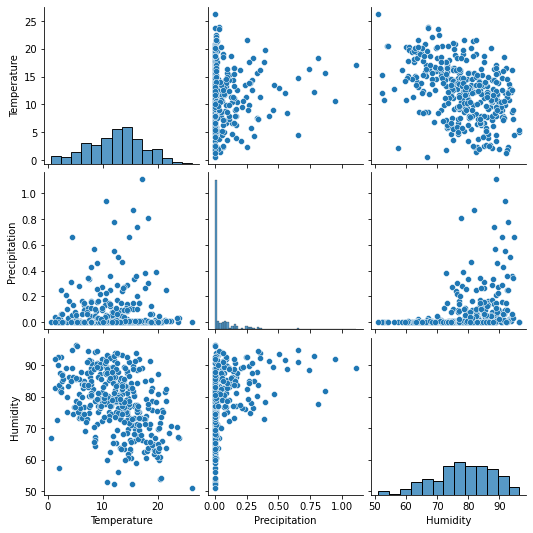

In [566]:
sb.pairplot(W, height = 2.5)

In [567]:
corr = W.corr()
corr.style.background_gradient(cmap='coolwarm')


,Temperature,Precipitation,Humidity
Temperature,1.000000,-0.024872,-0.414671
Precipitation,-0.024872,1.000000,0.352707
Humidity,-0.414671,0.352707,1.000000


### DayType 
**Semaine, Weekend, Vacance, Jours Féries (valeurs binaires)**

In [568]:
print(D_T.shape)
print(D_T.head())

(365, 4)
   Week  Weekend  Vacation  Holiday
0     1        0         0        0
1     1        0         0        0
2     1        0         0        0
3     1        0         0        0
4     1        0         0        0


### DayDates
**Les Dates (YYYY-MM-DD) de 2015-01-26 jusqu'à 2016-01-25** 

In [569]:
print(D_D.shape)
print(D_D.head())

(365, 1)
            0
0  2015-01-26
1  2015-01-27
2  2015-01-28
3  2015-01-29
4  2015-01-30


## **Construire un Dataset pour la consommation quotidienne**


### 1-Transposé du dataset 

In [570]:
C_T=C.T
C_T.shape

(8760, 537)

### 2-Ajouter la colonne Date à notre dataset  

In [571]:
C_T.head()
C_F=C_T.assign(Date=D)
C_F.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,Date
0,0.99789,1.0377,1.0396,1.0813,0.99822,1.1490,1.0,1.0371,1.0310,1.00160,1.00060,1.1793,1.00040,1.00010,1.0862,1.0174,1.1387,1.0164,1.02210,1.0853,1.0212,1.1853,1.0959,1.6808,1.1047,1.3347,1.0256,1.0643,1.1463,1.0437,1.0768,1.01350,1.00090,2.0042,1.0365,1.00000,1.1169,1.0724,1.2211,1.01250,...,1.2207,1.02610,1.8418,1.0678,1.00030,1.0115,1.0252,1.1348,1.00490,1.0293,1.00010,1.2069,1.0,1.2221,1.2155,1.2564,1.0509,1.0890,1.0162,1.0504,1.00140,1.4234,1.1155,1.5182,1.0027,1.1573,1.00050,1.00040,1.0017,1.01890,1.0756,1.0062,1.00000,1.02320,1.0909,1.0589,1.1557,1.0162,1.0229,2015-01-26
1,0.99386,1.0259,1.0284,1.0377,0.99719,1.0985,1.0,1.0209,1.0125,1.00020,0.99987,1.0913,0.99992,0.99983,1.0407,1.0085,1.0827,1.0038,1.00360,1.0698,1.0135,1.1729,1.0633,1.5083,1.0850,1.2151,1.0129,1.0225,1.1116,1.0382,1.0431,1.00270,1.00010,1.6574,1.0172,0.99981,1.0529,1.0265,1.1476,1.00480,...,1.2096,1.00780,1.3871,1.0709,0.99995,1.0048,1.0161,1.0861,0.99627,1.0197,0.99996,1.1109,1.0,1.1527,1.1250,1.1799,1.0300,1.0706,1.0153,1.0187,1.00010,1.2364,1.0615,1.3772,1.0080,1.1050,0.99989,1.00060,1.0031,1.00460,1.0765,1.0056,1.00000,1.00840,1.0626,1.0431,1.1062,1.0164,1.0108,2015-01-26
2,0.99651,1.0094,1.0231,1.0252,0.99857,1.0588,1.0,1.0149,1.0047,0.99982,0.99966,1.0651,0.99978,0.99976,1.0248,1.0061,1.0358,1.0104,0.99462,1.0255,1.0066,1.1136,1.0827,1.4945,1.0746,1.1623,1.0046,1.0175,1.0595,1.0213,1.0318,0.99956,0.99997,1.4375,1.0152,0.99968,1.0333,1.0262,1.1230,1.00090,...,1.1930,0.99950,1.2288,1.0708,0.99873,1.0058,1.0098,1.0574,0.99546,1.0134,0.99994,1.0713,1.0,1.0699,1.0738,1.1073,1.0194,1.0429,1.0102,1.0027,0.99990,1.1707,1.0368,1.5056,1.0123,1.0875,0.99971,1.00050,1.0033,0.99863,1.0642,1.0042,1.00000,1.00160,1.0524,1.0195,1.0884,1.0147,1.0039,2015-01-26
3,0.99973,1.0056,1.0116,1.0222,0.99907,1.0377,1.0,1.0063,1.0058,0.99985,0.99984,1.0534,0.99989,0.99991,1.0213,1.0022,1.0236,1.0409,0.99026,1.0013,1.0115,1.0907,1.0814,1.4152,1.1086,1.1699,1.0121,1.0200,1.0308,1.0141,1.0336,0.99923,0.99998,1.4729,1.0150,0.99984,1.0322,1.0272,1.0944,0.99975,...,1.1873,0.99788,1.1924,1.0793,0.99763,1.0138,1.0078,1.0330,1.00420,1.0101,0.99997,1.0497,1.0,1.0308,1.0993,1.0638,1.0153,1.0162,1.0103,0.9993,0.99995,1.1719,1.0405,1.9377,1.0076,1.0813,0.99986,0.99999,1.0018,1.00110,1.0423,1.0086,1.00000,0.99926,1.0462,1.0243,1.0891,1.0131,1.0065,2015-01-26
4,1.00040,1.0348,1.0162,1.0423,1.00050,1.1835,1.0,1.0077,1.0193,0.99993,0.99999,1.0604,0.99999,1.00000,1.0324,1.0011,1.0393,1.0465,1.02170,1.0156,1.0277,1.1213,1.1640,1.3533,1.1929,1.2090,1.0507,1.0269,1.0520,1.0136,1.0434,0.99797,0.99999,1.6483,1.0178,1.00000,1.0458,1.0383,1.0929,0.99856,...,1.2130,1.00440,1.2229,1.0846,0.99878,1.0182,1.0164,1.0479,1.03570,1.0228,1.00000,1.0628,1.0,1.0645,1.2383,1.0924,1.0099,1.0094,1.0344,1.0091,0.99998,1.2155,1.0591,1.4600,1.0010,1.0798,0.99999,1.00310,1.0060,1.03290,1.0324,1.0195,0.99997,1.00270,1.0580,1.0521,1.0951,1.0122,1.0300,2015-01-26


### 3-Indexer notre dataset avec la colonne Date 

In [572]:
d_series = pd.to_datetime(C_F['Date'])
d_index = pd.DatetimeIndex(d_series.values)
DF=C_F.set_index(d_index)


In [573]:
DF.shape

(8760, 538)

### 4-Faire le regroupement par rapport les jours en faisons la moyenne 

In [574]:
DF_daily =DF.resample('D').mean()
print(DF_daily.shape)
DF_daily.head(-5)

(365, 537)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536
2015-01-26,1.000765,1.109046,1.131812,1.270600,1.002182,1.278029,1.000029,1.143950,1.084283,1.000217,0.999998,1.371796,0.999999,1.001493,1.143825,1.033433,1.211946,1.098454,1.276982,1.166129,1.152187,1.466050,1.686317,2.085071,1.292867,1.609112,1.158721,1.177388,1.281121,1.165829,1.067600,1.032140,1.000039,3.294646,1.075038,0.999970,1.187658,1.294538,1.544413,1.086467,...,1.111925,1.458762,1.079412,2.659850,1.171279,0.999973,1.053012,1.128671,1.207267,1.095514,1.114217,0.999999,1.373979,1.000663,1.624154,1.909417,1.565721,1.186054,1.133117,1.133117,1.127738,1.000570,1.947692,1.236000,1.888917,1.025646,1.181125,0.999998,1.011733,1.024950,1.106022,1.141612,1.050246,1.001863,1.052953,1.239096,1.251271,1.107071,1.098883,1.157713
2015-01-27,1.000000,1.100896,1.133155,1.256350,1.005065,1.223754,1.000001,1.143867,1.078379,1.000332,1.000073,1.397087,0.999998,1.000818,1.144783,1.034038,1.197771,1.101975,1.267654,1.170525,1.145908,1.404358,1.741083,2.104008,1.279017,1.628429,1.160050,1.168092,1.260929,1.152796,1.064813,1.028777,1.000000,3.418575,1.076208,0.999998,1.183096,1.258279,1.522671,1.089579,...,1.105192,1.420246,1.075455,2.614162,1.180667,1.000000,1.053858,1.131350,1.206354,1.096614,1.108229,0.999999,1.367438,0.999993,1.495908,1.876112,1.537408,1.195467,1.129975,1.132112,1.123335,1.000213,1.814442,1.233758,1.987933,1.023104,1.177983,0.999997,1.010652,1.024613,1.105478,1.145246,1.057971,1.000003,1.043907,1.232067,1.248142,1.059962,1.086383,1.152904
2015-01-28,1.000000,1.097925,1.133266,1.254662,1.004320,1.169663,1.000001,1.136688,1.077346,1.000287,1.000073,1.417342,0.999998,1.001298,1.147292,1.034412,1.205421,1.102104,1.274692,1.165813,1.147421,1.356413,1.759625,2.118183,1.294271,1.624392,1.167271,1.169417,1.249537,1.147146,1.062833,1.026421,1.000000,3.438508,1.071483,0.999998,1.182392,1.268363,1.515467,1.091783,...,1.100875,1.424921,1.075901,2.619571,1.179379,1.000000,1.049842,1.125762,1.217096,1.097383,1.110662,0.999999,1.357087,0.999993,1.533875,1.772108,1.544683,1.188896,1.126467,1.127871,1.119083,1.000193,1.770758,1.227679,2.004663,1.023508,1.176271,0.999997,1.009828,1.026557,1.102762,1.142546,1.060742,1.000003,1.042300,1.239879,1.253183,1.047679,1.081604,1.144575
2015-01-29,1.000000,1.103004,1.139263,1.240804,1.005365,1.222308,1.000001,1.133996,1.078362,1.000654,1.000073,1.434008,0.999998,1.001451,1.148387,1.033863,1.188750,1.098121,1.272212,1.162542,1.143342,1.336088,1.741975,2.089683,1.229875,1.635725,1.170167,1.147533,1.248479,1.149458,1.060912,1.026249,1.000000,3.378983,1.071950,0.999998,1.184592,1.256529,1.540975,1.088787,...,1.109492,1.466592,1.076090,2.614121,1.183629,1.000000,1.053646,1.121954,1.231683,1.099650,1.111333,0.999999,1.352892,0.999993,1.557775,1.773354,1.523629,1.241521,1.131075,1.119838,1.108107,1.000227,1.814388,1.228100,2.085817,1.023854,1.170313,0.999997,1.009707,1.027418,1.110962,1.144563,1.064088,1.000003,1.044288,1.259575,1.256738,1.064212,1.073761,1.144892
2015-01-30,1.000765,1.114100,1.141808,1.250325,1.007264,1.249838,1.000029,1.127921,1.076458,1.000467,0.999998,1.425154,0.999999,1.000719,1.144704,1.034267,1.167396,1.097250,1.282179,1.148213,1.138842,1.349463,1.733604,2.040329,1.240604,1.634292,1.180067,1.149038,1.257329,1.157625,1.061958,1.027049,1.000039,3.431812,1.071996,0.999970,1.183171,1.281346,1.580617,1.083879,...,1.106483,1.513321,1.084233,2.662679,1.190925,0.999973,1.054754,1.116817,1.229963,1.091180,1.115204,0.999999,1.347138,1.000663,1.536975,1.761525,1.574704,1.322671,1.128200,1.123012,1.108052,1.000159,1.870888,1.234171,2.029796,1.025575,1.167117,0.999998,1.009396,1.026791,1.113879,1.132275,1.056596,1.001863,1.050083,1.258725,1.259608,1.092017,1.085621,1.148225
...,...,...,...,...,...,...,...,...,...,...,...,..

### 5-Faire la moyenne de tous les compteurs 

In [575]:
s = pd.Series(range(0,365))
DF=DF_daily.set_index(s)
df= DF.mean(axis=1)
df=df.to_frame()
df.columns =['Consomation'] 
df.head()


,Consomation
0,1.343013
1,1.326995
2,1.320158
3,1.323713
4,1.328061


### 6-Ajouter les tables Weather et DayType à notre dataset  

In [576]:
df=df.assign(Date=D_D)
df=df.assign(Week=D_T.iloc[:,0],Weekend=D_T.iloc[:,1],Vacation=D_T.iloc[:,2],Holiday=D_T.iloc[:,3])
df=df.assign(Temperature=W.iloc[:,0],Precipitation=W.iloc[:,1],Humidity=W.iloc[:,2])
df.head()


,Consomation,Date,Week,Weekend,Vacation,Holiday,Temperature,Precipitation,Humidity
0,1.343013,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
1,1.326995,2015-01-27,1,0,0,0,6.483333,0.000000,82.875000
2,1.320158,2015-01-28,1,0,0,0,8.345833,0.050000,82.458333
3,1.323713,2015-01-29,1,0,0,0,6.270833,0.166667,84.166667
4,1.328061,2015-01-30,1,0,0,0,4.295833,0.308333,85.041667


In [577]:
df.shape

(365, 9)

## Visualiser la relation entre la temperature et la consomation

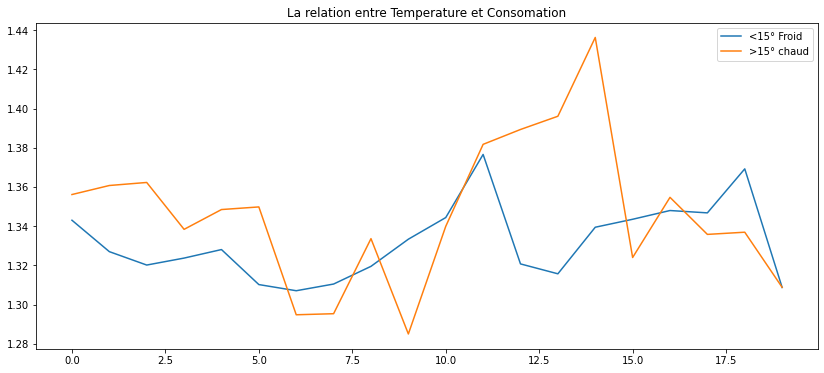

In [578]:
Dch=df[df["Temperature"]>15]
Dfr=df[df["Temperature"]<15]
Dch=Dch.reset_index()
Dfr=Dfr.reset_index()
plt.plot(Dfr['Consomation'].iloc[0:20],label="<15° Froid")
plt.plot(Dch['Consomation'].iloc[0:20],label='>15° chaud')
plt.legend()
plt.title('La relation entre Temperature et Consomation')
plt.show()

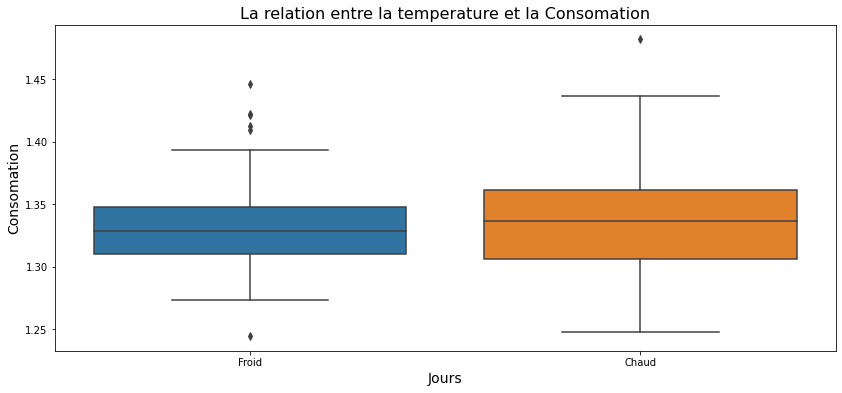

In [579]:
H= pd.concat([Dfr['Consomation'],Dch['Consomation']], axis=1)
H.columns = ['Froid', 'Chaud']
bp=sb.boxplot(data=H)
bp.axes.set_title("La relation entre la temperature et la Consomation", fontsize=16)
bp.set_xlabel("Jours", fontsize=14)
bp.set_ylabel("Consomation", fontsize=14)
plt.show()

## Visualiser la relation entre les types de jours et la consomation

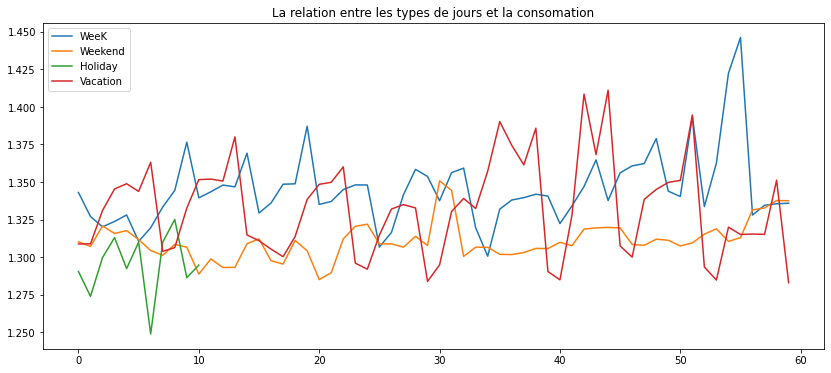

In [580]:
Dw=df[df["Week"]==1]
Dwnd=df[df["Weekend"]==1]
Dh=df[df["Holiday"]==1]
Dv=df[df["Vacation"]==1]
Dwnd=Dwnd.reset_index()
Dw=Dw.reset_index()
Dh=Dh.reset_index()
Dv=Dv.reset_index()
plt.plot(Dw['Consomation'].iloc[0:60],label='WeeK')
plt.plot(Dwnd['Consomation'].iloc[0:60],label="Weekend")
plt.plot(Dh['Consomation'].iloc[0:60],label='Holiday')
plt.plot(Dv['Consomation'].iloc[0:60],label="Vacation")
plt.legend()
plt.title('La relation entre les types de jours et la consomation')
plt.show()

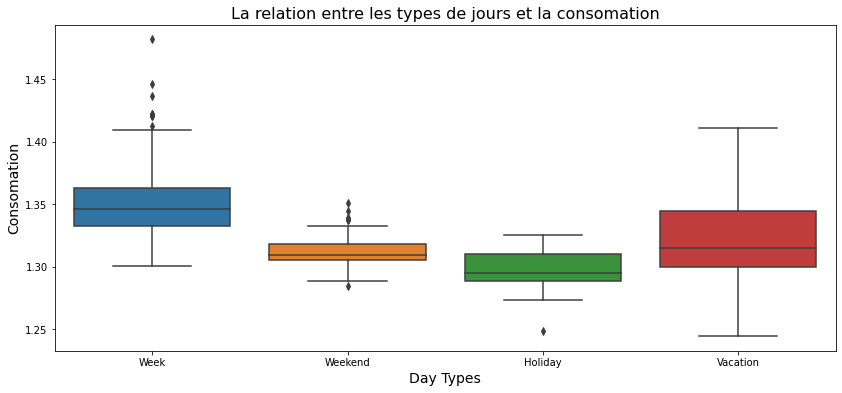

In [581]:
H= pd.concat([Dw['Consomation'],Dwnd['Consomation'],Dh['Consomation'],Dv['Consomation']], axis=1)
H.columns = ['Week', 'Weekend',"Holiday","Vacation"]
bp=sb.boxplot(data=H)
bp.axes.set_title("La relation entre les types de jours et la consomation", fontsize=16)
bp.set_xlabel("Day Types", fontsize=14)
bp.set_ylabel("Consomation", fontsize=14)
plt.show()

## Visualiser la relation entre les saisons de l'année  et la consomation

In [582]:
# Contruire les Datasets des saisons (HIVER, PRINTEMPS, ÉTÉ ET AUTOMNE)
D_ete=df.iloc[146:238,:]
D_automne=df.iloc[238:329,:]
D_printemps=df.iloc[54:146]
D_hiver=df.drop(df.index[54:329])
D_ete

,Consomation,Date,Week,Weekend,Vacation,Holiday,Temperature,Precipitation,Humidity
146,1.307677,2015-06-21,0,1,0,0,17.895833,0.008333,73.750000
147,1.324718,2015-06-22,1,0,0,0,14.479167,0.025000,81.291667
148,1.334965,2015-06-23,1,0,0,0,15.141667,0.000000,71.166667
149,1.348503,2015-06-24,1,0,0,0,18.162500,0.000000,62.708333
150,1.358786,2015-06-25,1,0,0,0,20.279167,0.000000,59.916667
...,...,...,...,...,...,...,...,...,...
233,1.330954,2015-09-16,1,0,0,0,16.312500,0.741667,88.375000
234,1.342273,2015-09-17,1,0,0,0,14.762500,0.008333,77.541667
235,1.370264,2015-09-18,1,0,0,0,14.887500,0.100000,82.625000
236,1.301666,2015-09-19,0,1,0,0,14.229167,0.008333,83.458333


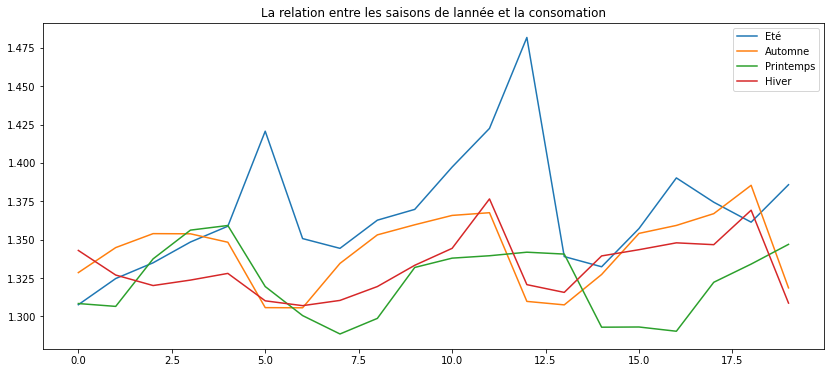

In [583]:
D_ete=D_ete.reset_index()
D_automne=D_automne.reset_index()
D_printemps=D_printemps.reset_index()
D_hiver=D_hiver.reset_index()
plt.plot(D_ete['Consomation'].iloc[0:20],label='Eté')
plt.plot(D_automne['Consomation'].iloc[0:20],label="Automne")
plt.plot(D_printemps['Consomation'].iloc[0:20],label='Printemps')
plt.plot(D_hiver['Consomation'].iloc[0:20],label="Hiver")
plt.legend()
plt.title('La relation entre les saisons de lannée et la consomation')
plt.show()

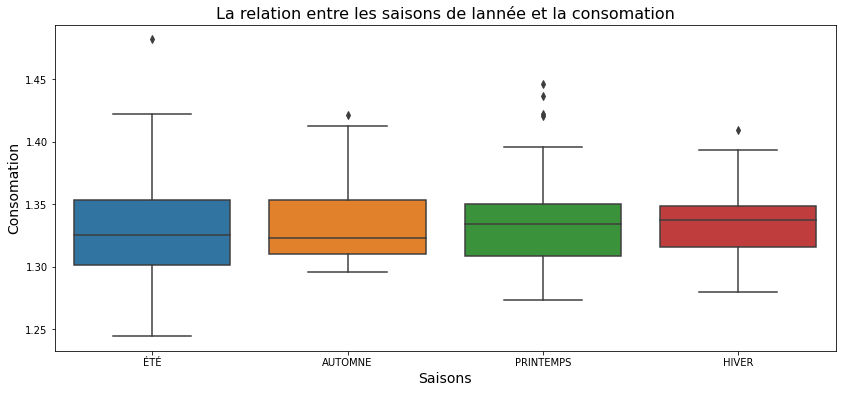

In [584]:
H= pd.concat([D_ete['Consomation'],D_automne['Consomation'],D_printemps['Consomation'],D_hiver['Consomation']], axis=1)
H.columns = ['ÉTÉ','AUTOMNE','PRINTEMPS','HIVER']
bp=sb.boxplot(data=H)
bp.axes.set_title("La relation entre les saisons de lannée et la consomation", fontsize=16)
bp.set_xlabel("Saisons", fontsize=14)
bp.set_ylabel("Consomation", fontsize=14)
plt.show()

### 1-Transposé du dataset 

In [585]:
C_T=C.T
C_T.shape

(8760, 537)

### Repeter les Données pour 24h

In [586]:
#Type de jours (Week, Weekend, Holiday et Vacation) 
w=np.repeat(D_T["Week"],24)
w=w.reset_index()
w=w.drop("index",axis=1)
wd=np.repeat(D_T["Weekend"],24)
wd=wd.reset_index()
wd=wd.drop("index",axis=1)
h=np.repeat(D_T["Holiday"],24)
h=h.reset_index()
h=h.drop("index",axis=1)
v=np.repeat(D_T["Vacation"],24)
v=v.reset_index()
v=v.drop("index",axis=1)

In [587]:
#Weather (Temperature, Precepitation et Humidity)
t=np.repeat(W["Temperature"],24)
t=t.reset_index()
t=t.drop("index",axis=1)
p=np.repeat(W["Precipitation"],24)
p=p.reset_index()
p=p.drop("index",axis=1)
hm=np.repeat(W["Humidity"],24)
hm=hm.reset_index()
hm=hm.drop("index",axis=1)


### Ajouter les données à notre dataset   

In [588]:
df=C_T
df=df.assign(Date=D) #Date
df=df.assign(Week=w,Weekend=wd,Holiday=h,Vacation=v) #Weather
df=df.assign(Temperature=t,Precipitation=p,Humidity=hm) #DayType
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,Date,Week,Weekend,Holiday,Vacation,Temperature,Precipitation,Humidity
0,0.99789,1.0377,1.0396,1.0813,0.99822,1.1490,1.0,1.0371,1.0310,1.00160,1.00060,1.1793,1.00040,1.00010,1.0862,1.0174,1.1387,1.0164,1.02210,1.0853,1.0212,1.1853,1.0959,1.6808,1.1047,1.3347,1.0256,1.0643,1.1463,1.0437,1.0768,1.01350,1.00090,2.0042,1.0365,1.00000,1.1169,1.0724,1.2211,1.01250,...,1.1348,1.00490,1.0293,1.00010,1.2069,1.00000,1.2221,1.2155,1.2564,1.0509,1.0890,1.0162,1.0504,1.00140,1.4234,1.1155,1.5182,1.0027,1.1573,1.00050,1.00040,1.0017,1.01890,1.0756,1.0062,1.00000,1.02320,1.0909,1.0589,1.1557,1.0162,1.0229,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
1,0.99386,1.0259,1.0284,1.0377,0.99719,1.0985,1.0,1.0209,1.0125,1.00020,0.99987,1.0913,0.99992,0.99983,1.0407,1.0085,1.0827,1.0038,1.00360,1.0698,1.0135,1.1729,1.0633,1.5083,1.0850,1.2151,1.0129,1.0225,1.1116,1.0382,1.0431,1.00270,1.00010,1.6574,1.0172,0.99981,1.0529,1.0265,1.1476,1.00480,...,1.0861,0.99627,1.0197,0.99996,1.1109,1.00000,1.1527,1.1250,1.1799,1.0300,1.0706,1.0153,1.0187,1.00010,1.2364,1.0615,1.3772,1.0080,1.1050,0.99989,1.00060,1.0031,1.00460,1.0765,1.0056,1.00000,1.00840,1.0626,1.0431,1.1062,1.0164,1.0108,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
2,0.99651,1.0094,1.0231,1.0252,0.99857,1.0588,1.0,1.0149,1.0047,0.99982,0.99966,1.0651,0.99978,0.99976,1.0248,1.0061,1.0358,1.0104,0.99462,1.0255,1.0066,1.1136,1.0827,1.4945,1.0746,1.1623,1.0046,1.0175,1.0595,1.0213,1.0318,0.99956,0.99997,1.4375,1.0152,0.99968,1.0333,1.0262,1.1230,1.00090,...,1.0574,0.99546,1.0134,0.99994,1.0713,1.00000,1.0699,1.0738,1.1073,1.0194,1.0429,1.0102,1.0027,0.99990,1.1707,1.0368,1.5056,1.0123,1.0875,0.99971,1.00050,1.0033,0.99863,1.0642,1.0042,1.00000,1.00160,1.0524,1.0195,1.0884,1.0147,1.0039,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
3,0.99973,1.0056,1.0116,1.0222,0.99907,1.0377,1.0,1.0063,1.0058,0.99985,0.99984,1.0534,0.99989,0.99991,1.0213,1.0022,1.0236,1.0409,0.99026,1.0013,1.0115,1.0907,1.0814,1.4152,1.1086,1.1699,1.0121,1.0200,1.0308,1.0141,1.0336,0.99923,0.99998,1.4729,1.0150,0.99984,1.0322,1.0272,1.0944,0.99975,...,1.0330,1.00420,1.0101,0.99997,1.0497,1.00000,1.0308,1.0993,1.0638,1.0153,1.0162,1.0103,0.9993,0.99995,1.1719,1.0405,1.9377,1.0076,1.0813,0.99986,0.99999,1.0018,1.00110,1.0423,1.0086,1.00000,0.99926,1.0462,1.0243,1.0891,1.0131,1.0065,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
4,1.00040,1.0348,1.0162,1.0423,1.00050,1.1835,1.0,1.0077,1.0193,0.99993,0.99999,1.0604,0.99999,1.00000,1.0324,1.0011,1.0393,1.0465,1.02170,1.0156,1.0277,1.1213,1.1640,1.3533,1.1929,1.2090,1.0507,1.0269,1.0520,1.0136,1.0434,0.99797,0.99999,1.6483,1.0178,1.00000,1.0458,1.0383,1.0929,0.99856,...,1.0479,1.03570,1.0228,1.00000,1.0628,1.00000,1.0645,1.2383,1.0924,1.0099,1.0094,1.0344,1.0091,0.99998,1.2155,1.0591,1.4600,1.0010,1.0798,0.99999,1.00310,1.0060,1.03290,1.0324,1.0195,0.99997,1.00270,1.0580,1.0521,1.0951,1.0122,1.0300,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.99994,1.1166,1.2222,1.4403,1.12810,1.5190,1.0,1.2970,1.1070,1.00200,1.00000,1.4333,1.00000,1.00030,1.1695,1.0335,1.3229,1.1071,1.84770,1.3731,1.3694,1.7901,2.3636,2.5414,1.5129,1.7892,1.3223,1.4021,1.4542,1.2860,1.0890,1.03970,1.00000,3.8282,1.1120,1.00000,1.1928,1.3819,1.7010,1.16760,...,1.2481,1.18370,1.1148,1.00000,1.5276,0.99989,2.1183,2.9596,1.4379,1.0034,1.1456,1.2471,1.2009,1.00040,2.2970,1.2949,2.5682,1.0529,1.2335,1.00000,1.01750,1.0496,1.22540,1.3230,1.0640,0.99980,1.

temperature

In [589]:
import random
randomlist = []
for i in range(0,4):
 n = random.randint(1,537)
 randomlist.append(n)
i,j,k,l=randomlist
print(i,j,k,l)

237 188 498 5


In [590]:
Dch=df[df["Temperature"]>15] #CHAUD
Dfr=df[df["Temperature"]<15] #FROID

5


Text(0.5, 1.0, 'Client 5')

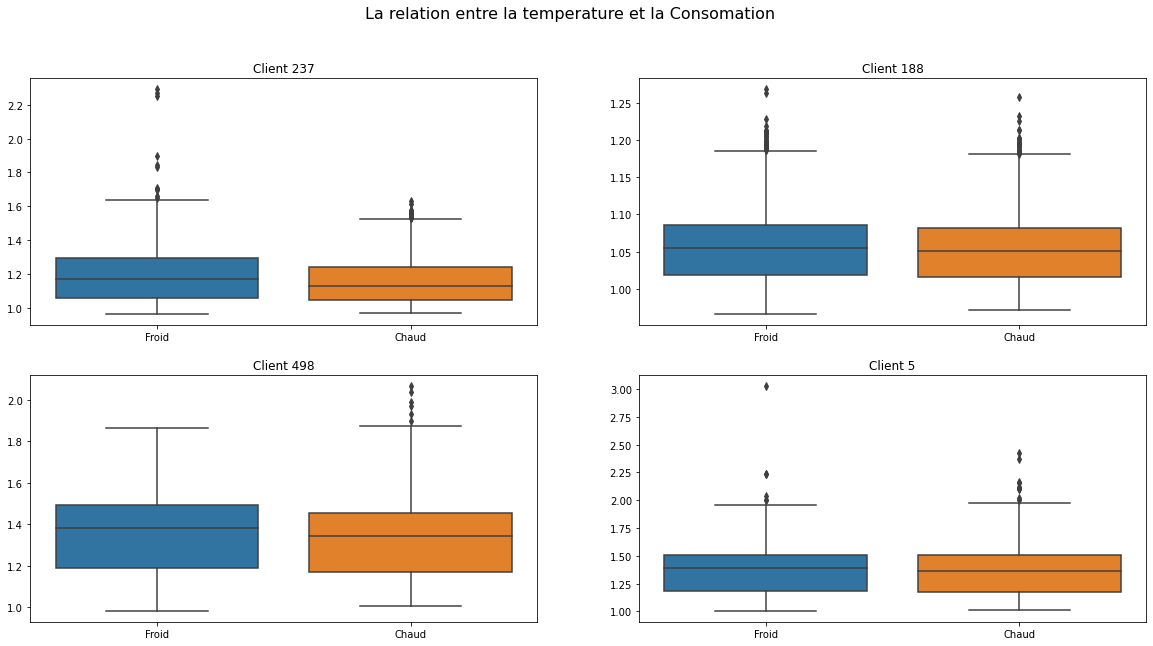

In [591]:
#Boxplot Temperature/Consomation
print(l)
c1= pd.concat([Dfr[i],Dch[i]], axis=1)
c1.columns = ['Froid', 'Chaud']
c2= pd.concat([Dfr[j],Dch[j]], axis=1)
c2.columns = ['Froid', 'Chaud']
c3= pd.concat([Dfr[k],Dch[k]], axis=1)
c3.columns = ['Froid', 'Chaud']
c4= pd.concat([Dfr[l],Dch[l]], axis=1)
c4.columns = ['Froid', 'Chaud']
f, axes = plt.subplots(2, 2)
f.set_size_inches(20,10)
f.suptitle("La relation entre la temperature et la Consomation",fontsize=16)
sb.boxplot(data=c1, ax=axes[0,0])
axes[0, 0].set_title('Client '+str(i))
sb.boxplot(data=c2, ax=axes[0,1])
axes[0, 1].set_title('Client '+str(j))
sb.boxplot(data=c3, ax=axes[1,0])
axes[1, 0].set_title('Client '+str(k))
sb.boxplot(data=c4, ax=axes[1,1])
axes[1,1].set_title('Client '+str(l))

In [592]:
Dw=df[df["Week"]==1] #WEEK
Dwnd=df[df["Weekend"]==1] #WEEKEND 
Dh=df[df["Holiday"]==1] #HOLIDAY
Dv=df[df["Vacation"]==1] #VACATION

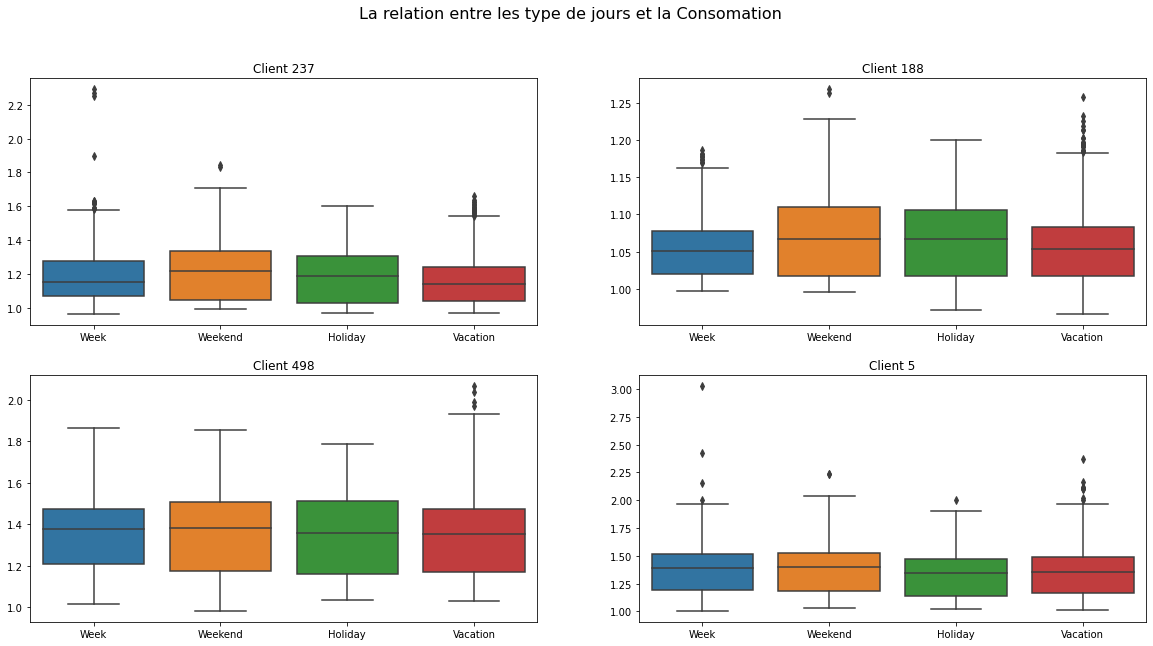

In [593]:
#Boxplot Type de jours/Consomation
c1= pd.concat([Dw[i],Dwnd[i],Dh[i],Dv[i]], axis=1)
c1.columns = ['Week', 'Weekend',"Holiday","Vacation"]
c2= pd.concat([Dw[j],Dwnd[j],Dh[j],Dv[j]], axis=1)
c2.columns = ['Week', 'Weekend',"Holiday","Vacation"]
c3= pd.concat([Dw[k],Dwnd[k],Dh[k],Dv[k]], axis=1)
c3.columns = ['Week', 'Weekend',"Holiday","Vacation"]
c4= pd.concat([Dw[l],Dwnd[l],Dh[l],Dv[l]], axis=1)
c4.columns = ['Week', 'Weekend',"Holiday","Vacation"]
f, axes = plt.subplots(2, 2)
f.set_size_inches(20,10)
f.suptitle("La relation entre les type de jours et la Consomation", fontsize=16)
sb.boxplot(data=c1, ax=axes[0,0])
axes[0, 0].set_title('Client '+str(i))
sb.boxplot(data=c2, ax=axes[0,1])
axes[0, 1].set_title('Client '+str(j))
sb.boxplot(data=c3, ax=axes[1,0])
axes[1, 0].set_title('Client '+str(k))
sb.boxplot(data=c4, ax=axes[1,1])
axes[1,1].set_title('Client '+str(l))
plt.show()

In [594]:
D_e=df.iloc[3504:5712,:] #ETE 
D_a=df.iloc[5712:7986,:] #AUTOMNE
D_p=df.iloc[1296:3504,:] #PRINTEMPS
D_h=df.iloc[0:1296,:] 
D_h.append(df.iloc[7986:8760]) #HIVER


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,Date,Week,Weekend,Holiday,Vacation,Temperature,Precipitation,Humidity
0,0.99789,1.0377,1.0396,1.0813,0.99822,1.1490,1.0,1.0371,1.0310,1.00160,1.00060,1.1793,1.00040,1.00010,1.0862,1.0174,1.1387,1.0164,1.02210,1.0853,1.0212,1.1853,1.0959,1.6808,1.1047,1.3347,1.0256,1.0643,1.1463,1.0437,1.0768,1.01350,1.00090,2.0042,1.0365,1.00000,1.1169,1.0724,1.2211,1.01250,...,1.1348,1.00490,1.0293,1.00010,1.2069,1.00000,1.2221,1.2155,1.2564,1.0509,1.0890,1.0162,1.0504,1.00140,1.4234,1.1155,1.5182,1.0027,1.1573,1.00050,1.00040,1.0017,1.01890,1.0756,1.0062,1.00000,1.02320,1.0909,1.0589,1.1557,1.0162,1.0229,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
1,0.99386,1.0259,1.0284,1.0377,0.99719,1.0985,1.0,1.0209,1.0125,1.00020,0.99987,1.0913,0.99992,0.99983,1.0407,1.0085,1.0827,1.0038,1.00360,1.0698,1.0135,1.1729,1.0633,1.5083,1.0850,1.2151,1.0129,1.0225,1.1116,1.0382,1.0431,1.00270,1.00010,1.6574,1.0172,0.99981,1.0529,1.0265,1.1476,1.00480,...,1.0861,0.99627,1.0197,0.99996,1.1109,1.00000,1.1527,1.1250,1.1799,1.0300,1.0706,1.0153,1.0187,1.00010,1.2364,1.0615,1.3772,1.0080,1.1050,0.99989,1.00060,1.0031,1.00460,1.0765,1.0056,1.00000,1.00840,1.0626,1.0431,1.1062,1.0164,1.0108,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
2,0.99651,1.0094,1.0231,1.0252,0.99857,1.0588,1.0,1.0149,1.0047,0.99982,0.99966,1.0651,0.99978,0.99976,1.0248,1.0061,1.0358,1.0104,0.99462,1.0255,1.0066,1.1136,1.0827,1.4945,1.0746,1.1623,1.0046,1.0175,1.0595,1.0213,1.0318,0.99956,0.99997,1.4375,1.0152,0.99968,1.0333,1.0262,1.1230,1.00090,...,1.0574,0.99546,1.0134,0.99994,1.0713,1.00000,1.0699,1.0738,1.1073,1.0194,1.0429,1.0102,1.0027,0.99990,1.1707,1.0368,1.5056,1.0123,1.0875,0.99971,1.00050,1.0033,0.99863,1.0642,1.0042,1.00000,1.00160,1.0524,1.0195,1.0884,1.0147,1.0039,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
3,0.99973,1.0056,1.0116,1.0222,0.99907,1.0377,1.0,1.0063,1.0058,0.99985,0.99984,1.0534,0.99989,0.99991,1.0213,1.0022,1.0236,1.0409,0.99026,1.0013,1.0115,1.0907,1.0814,1.4152,1.1086,1.1699,1.0121,1.0200,1.0308,1.0141,1.0336,0.99923,0.99998,1.4729,1.0150,0.99984,1.0322,1.0272,1.0944,0.99975,...,1.0330,1.00420,1.0101,0.99997,1.0497,1.00000,1.0308,1.0993,1.0638,1.0153,1.0162,1.0103,0.9993,0.99995,1.1719,1.0405,1.9377,1.0076,1.0813,0.99986,0.99999,1.0018,1.00110,1.0423,1.0086,1.00000,0.99926,1.0462,1.0243,1.0891,1.0131,1.0065,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
4,1.00040,1.0348,1.0162,1.0423,1.00050,1.1835,1.0,1.0077,1.0193,0.99993,0.99999,1.0604,0.99999,1.00000,1.0324,1.0011,1.0393,1.0465,1.02170,1.0156,1.0277,1.1213,1.1640,1.3533,1.1929,1.2090,1.0507,1.0269,1.0520,1.0136,1.0434,0.99797,0.99999,1.6483,1.0178,1.00000,1.0458,1.0383,1.0929,0.99856,...,1.0479,1.03570,1.0228,1.00000,1.0628,1.00000,1.0645,1.2383,1.0924,1.0099,1.0094,1.0344,1.0091,0.99998,1.2155,1.0591,1.4600,1.0010,1.0798,0.99999,1.00310,1.0060,1.03290,1.0324,1.0195,0.99997,1.00270,1.0580,1.0521,1.0951,1.0122,1.0300,2015-01-26,1,0,0,0,7.829167,0.008333,80.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.99994,1.1166,1.2222,1.4403,1.12810,1.5190,1.0,1.2970,1.1070,1.00200,1.00000,1.4333,1.00000,1.00030,1.1695,1.0335,1.3229,1.1071,1.84770,1.3731,1.3694,1.7901,2.3636,2.5414,1.5129,1.7892,1.3223,1.4021,1.4542,1.2860,1.0890,1.03970,1.00000,3.8282,1.1120,1.00000,1.1928,1.3819,1.7010,1.16760,...,1.2481,1.18370,1.1148,1.00000,1.5276,0.99989,2.1183,2.9596,1.4379,1.0034,1.1456,1.2471,1.2009,1.00040,2.2970,1.2949,2.5682,1.0529,1.2335,1.00000,1.01750,1.0496,1.22540,1.3230,1.0640,0.99980,1.

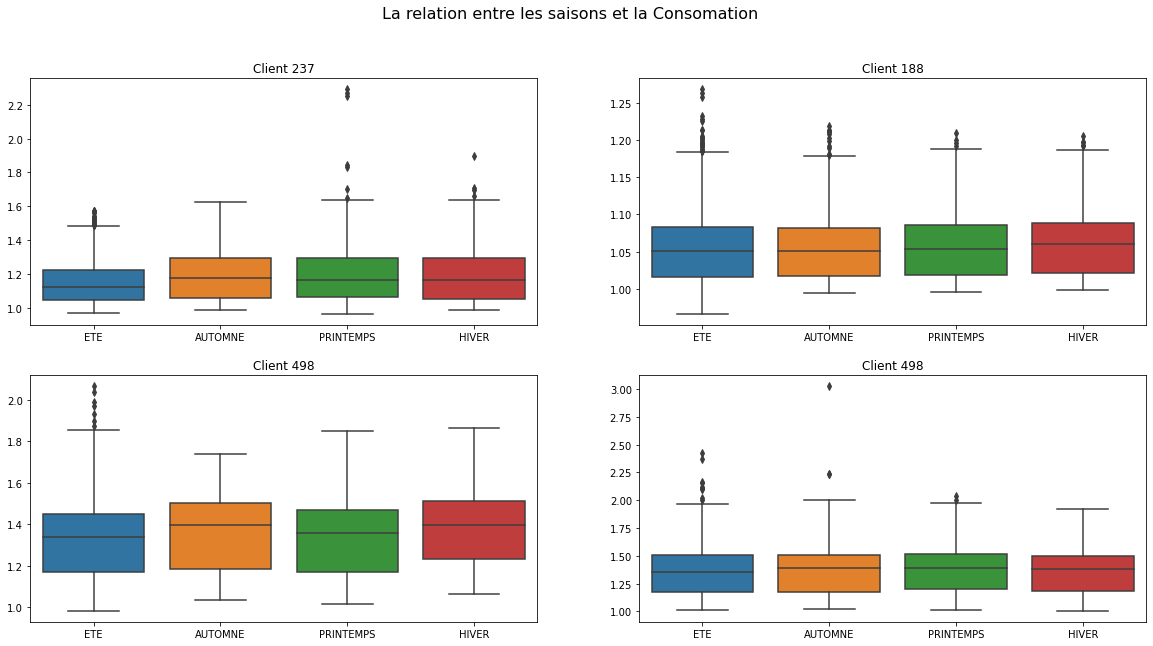

In [595]:
#Boxplot Saisons/Consomation
c1= pd.concat([D_e[i],D_a[i],D_p[i],D_h[i]], axis=1)
c1.columns = ['ETE','AUTOMNE','PRINTEMPS','HIVER']
c2= pd.concat([D_e[j],D_a[j],D_p[j],D_h[j]], axis=1)
c2.columns = ['ETE','AUTOMNE','PRINTEMPS','HIVER']
c3= pd.concat([D_e[k],D_a[k],D_p[k],D_h[k]], axis=1)
c3.columns = ['ETE','AUTOMNE','PRINTEMPS','HIVER']
c4= pd.concat([D_e[l],D_a[l],D_p[l],D_h[l]], axis=1)
c4.columns = ['ETE','AUTOMNE','PRINTEMPS','HIVER']
f, axes = plt.subplots(2, 2)
f.set_size_inches(20,10)
f.suptitle("La relation entre les saisons et la Consomation", fontsize=16)
sb.boxplot(data=c1, ax=axes[0,0])
axes[0, 0].set_title('Client '+str(i))
sb.boxplot(data=c2, ax=axes[0,1])
axes[0, 1].set_title('Client '+str(j))
sb.boxplot(data=c3, ax=axes[1,0])
axes[1, 0].set_title('Client '+str(k))
sb.boxplot(data=c4, ax=axes[1,1])
axes[1,1].set_title('Client '+str(k))
plt.show()

In [596]:
dm= C_T.mean(axis=1)
dm=dm.to_frame()
dm.columns =['Consomation'] 
dm=dm.assign(Date=D)
d_series = pd.to_datetime(dm['Date'])
d_index = pd.DatetimeIndex(d_series.values)
dm=dm.set_index(d_index)

### 3-Indexer notre dataset avec la colonne Date 

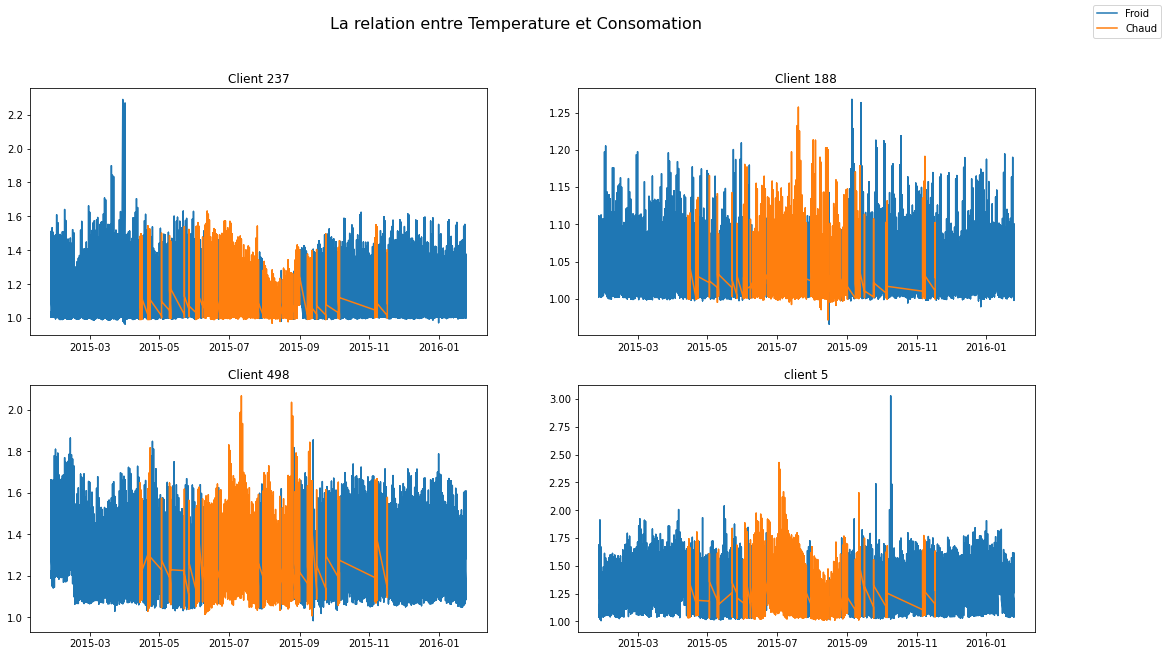

In [597]:
#indexer les tables par date
d_series = pd.to_datetime(Dfr['Date'])
d_index = pd.DatetimeIndex(d_series.values)
Dfr=Dfr.set_index(d_index)
d_series = pd.to_datetime(Dch['Date'])
d_index = pd.DatetimeIndex(d_series.values)
Dch=Dch.set_index(d_index)
fig, axs = plt.subplots(2, 2)
fig.suptitle('La relation entre Temperature et Consomation',fontsize=16)
axs[0, 0].plot(Dfr[i])
axs[0, 0].plot(Dch[i])
axs[0, 0].set_title('Client '+str(i))
axs[0, 1].plot(Dfr[j])
axs[0, 1].plot(Dch[j])
axs[0, 1].set_title('Client '+str(j))
axs[1, 0].plot(Dfr[k])
axs[1, 0].plot(Dch[k])
axs[1, 0].set_title('Client '+str(k))
axs[1, 1].plot(Dfr[l])
axs[1, 1].plot(Dch[l])
axs[1, 1].set_title('client '+str(l))
fig.set_size_inches(18,10)
fig.legend(["Froid","Chaud"])


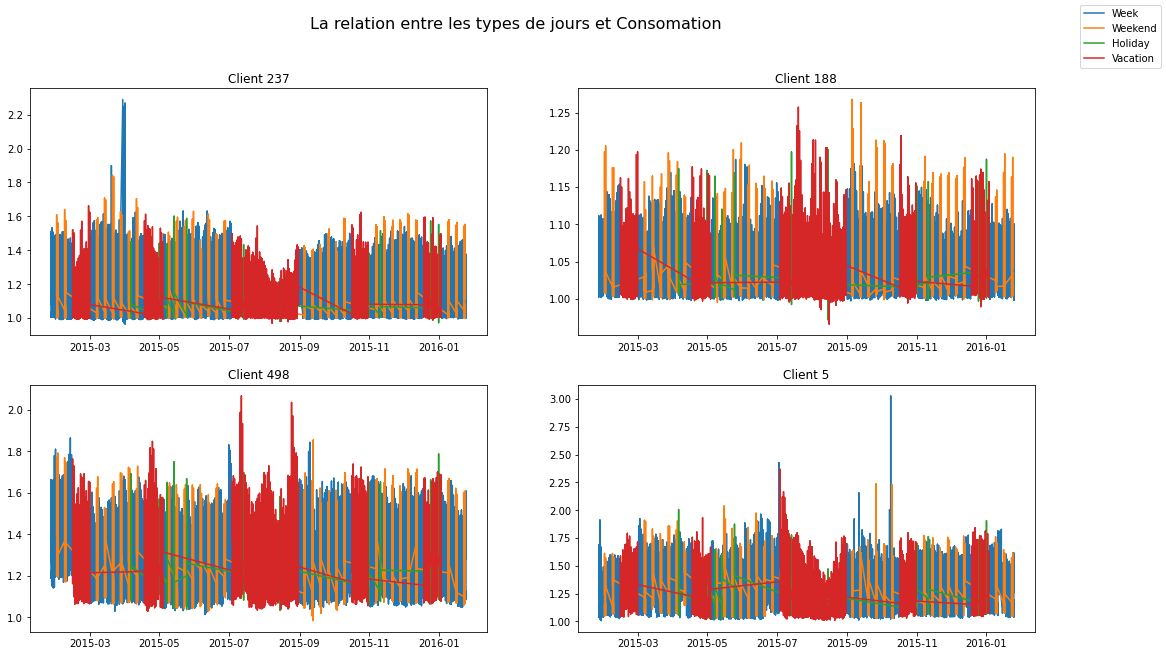

In [598]:
#indexer les tables par date
d_series = pd.to_datetime(Dw['Date'])
d_index = pd.DatetimeIndex(d_series.values)
Dw=Dw.set_index(d_index)
d_series = pd.to_datetime(Dwnd['Date'])
d_index = pd.DatetimeIndex(d_series.values)
Dwnd=Dwnd.set_index(d_index)
d_series = pd.to_datetime(Dh['Date'])
d_index = pd.DatetimeIndex(d_series.values)
Dh=Dh.set_index(d_index)
d_series = pd.to_datetime(Dv['Date'])
d_index = pd.DatetimeIndex(d_series.values)
Dv=Dv.set_index(d_index)
fig, axs = plt.subplots(2, 2)
fig.suptitle('La relation entre les types de jours et Consomation',fontsize=16)
axs[0, 0].plot(Dw[i],label="Week")
axs[0, 0].plot(Dwnd[i],label="Weekend")
axs[0, 0].plot(Dh[i],label="Holiday")
axs[0, 0].plot(Dv[i],label="Vacation")
axs[0, 0].set_title('Client '+str(i))
axs[0, 1].plot(Dw[j],label="Week")
axs[0, 1].plot(Dwnd[j],label="Weekend")
axs[0, 1].plot(Dh[j],label="Holiday")
axs[0, 1].plot(Dv[j],label="Vacation")
axs[0, 1].set_title('Client '+str(j))
axs[1, 0].plot(Dw[k],label="Week")
axs[1, 0].plot(Dwnd[k],label="Weekend")
axs[1, 0].plot(Dh[k],label="Holiday")
axs[1, 0].plot(Dv[k],label="Vacation")
axs[1, 0].set_title('Client '+str(k))
axs[1, 1].plot(Dw[l],label="Week")
axs[1, 1].plot(Dwnd[l],label="Weekend")
axs[1, 1].plot(Dh[l],label="Holiday")
axs[1, 1].plot(Dv[l],label="Vacation")
axs[1,1].set_title('Client '+str(l))
fig.set_size_inches(18,10)
fig.legend(["Week","Weekend","Holiday","Vacation"])

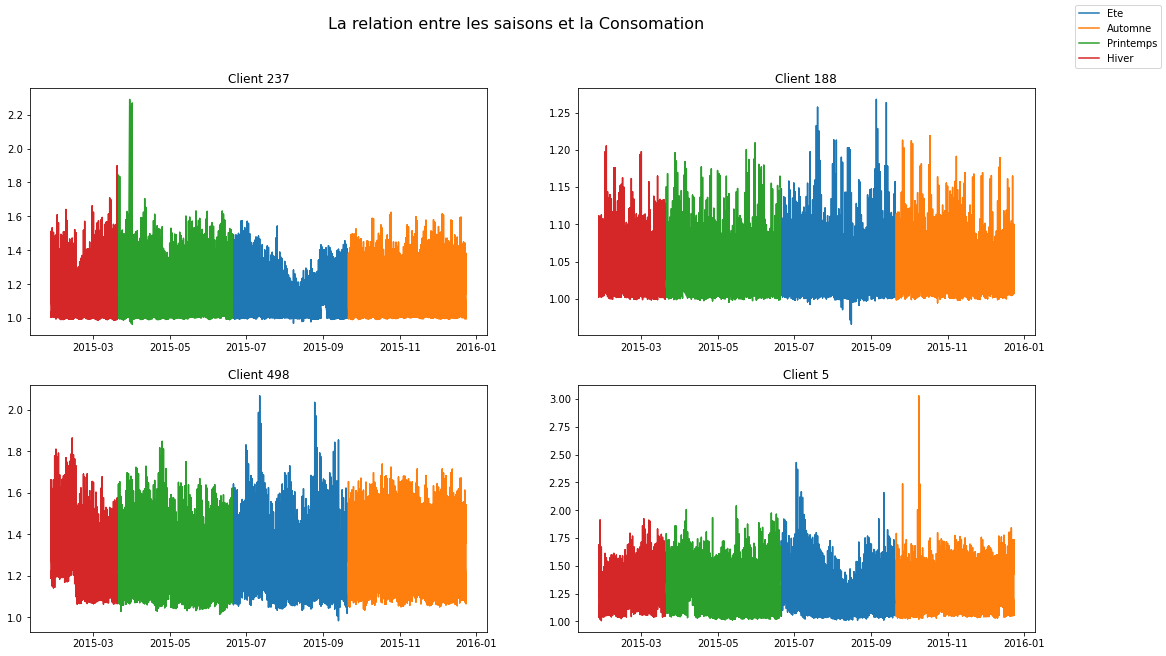

In [599]:
#indexer les tables par date
d_series = pd.to_datetime(D_e['Date'])
d_index = pd.DatetimeIndex(d_series.values)
D_e=D_e.set_index(d_index)
d_series = pd.to_datetime(D_a['Date'])
d_index = pd.DatetimeIndex(d_series.values)
D_a=D_a.set_index(d_index)
d_series = pd.to_datetime(D_p['Date'])
d_index = pd.DatetimeIndex(d_series.values)
D_p=D_p.set_index(d_index)
d_series = pd.to_datetime(D_h['Date'])
d_index = pd.DatetimeIndex(d_series.values)
D_h=D_h.set_index(d_index)
fig, axs = plt.subplots(2, 2)
fig.suptitle('La relation entre les saisons et la Consomation',fontsize=16)
axs[0, 0].plot(D_e[i])
axs[0, 0].plot(D_a[i])
axs[0, 0].plot(D_p[i])
axs[0, 0].plot(D_h[i])
axs[0, 0].set_title('Client '+str(i))
axs[0, 1].plot(D_e[j])
axs[0, 1].plot(D_a[j])
axs[0, 1].plot(D_p[j])
axs[0, 1].plot(D_h[j])
axs[0, 1].set_title('Client '+str(j))
axs[1, 0].plot(D_e[k])
axs[1, 0].plot(D_a[k])
axs[1, 0].plot(D_p[k])
axs[1, 0].plot(D_h[k])
axs[1, 0].set_title('Client '+str(k))
axs[1, 1].plot(D_e[l])
axs[1, 1].plot(D_a[l])
axs[1, 1].plot(D_p[l])
axs[1, 1].plot(D_h[l])
axs[1,1].set_title('Client '+str(l))
fig.set_size_inches(18,10)
fig.legend(["Ete","Automne","Printemps","Hiver"])